In [35]:
# Install dependencies
!pip install yfinance bs4 pandas matplotlib requests

In [36]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

plt.style.use('seaborn')

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [37]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")
tables = soup.find_all("table")

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue = pd.read_html(str(table))[0]
        tesla_revenue.columns = ["Date", "Revenue"]
        tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)
        tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
        tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)
        tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
        break

tesla_revenue.head()

In [39]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [40]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")
tables = soup.find_all("table")

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_revenue = pd.read_html(str(table))[0]
        gme_revenue.columns = ["Date", "Revenue"]
        gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)
        gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
        gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
        gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
        break

gme_revenue.head()

,Date,Revenue
0,1970-01-01 00:00:00.000002021,53823.0
1,1970-01-01 00:00:00.000002020,31536.0
2,1970-01-01 00:00:00.000002019,24578.0
3,1970-01-01 00:00:00.000002018,21461.0
4,1970-01-01 00:00:00.000002017,11759.0


NameError: name 'tesla_revenue' is not defined

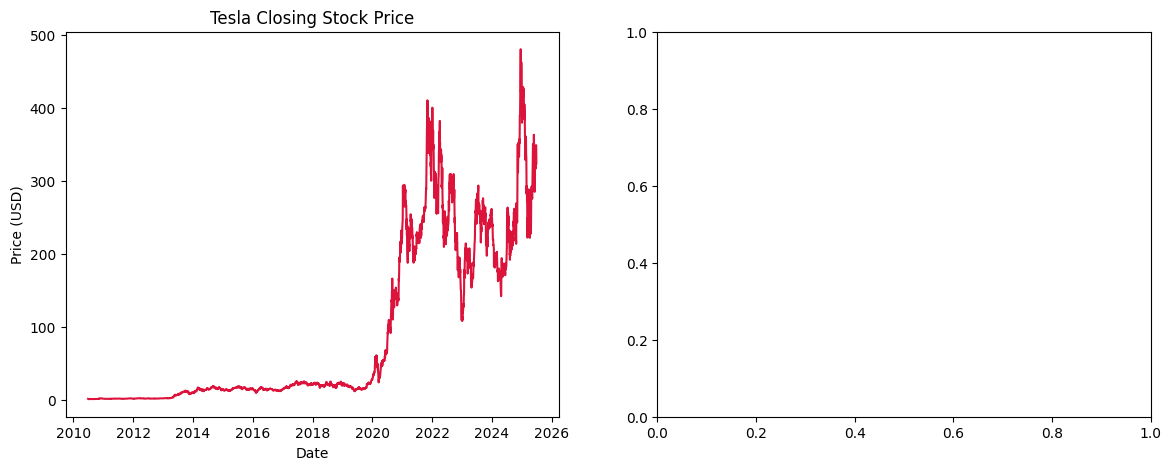

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

ax1.plot(tesla_data["Date"], tesla_data["Close"], color="crimson")
ax1.set_title("Tesla Closing Stock Price")
ax1.set_xlabel("Date"), ax1.set_ylabel("Price (USD)")

ax2.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], color="darkgreen")
ax2.set_title("Tesla Quarterly Revenue")
ax2.set_xlabel("Date"), ax2.set_ylabel("Revenue (USD Millions)")

plt.tight_layout()
plt.show()

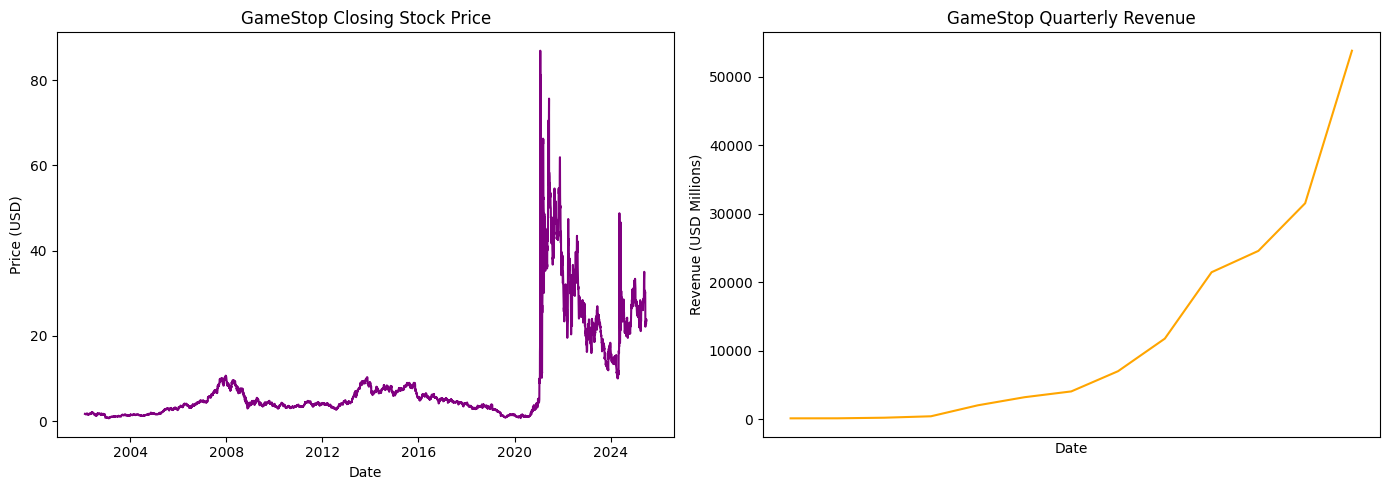

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

ax1.plot(gme_data["Date"], gme_data["Close"], color="purple")
ax1.set_title("GameStop Closing Stock Price")
ax1.set_xlabel("Date"), ax1.set_ylabel("Price (USD)")

ax2.plot(gme_revenue["Date"], gme_revenue["Revenue"], color="orange")
ax2.set_title("GameStop Quarterly Revenue")
ax2.set_xlabel("Date"), ax2.set_ylabel("Revenue (USD Millions)")

plt.tight_layout()
plt.show()